# Loan_Status Prediction

In [170]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import KNNImputer
import warnings
warnings.filterwarnings('ignore')

In [171]:
data = pd.read_csv("Loans - Training Set.csv")

In [172]:
data.head()

,Loan ID,Customer ID,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,6cf51492-02a2-423e-b93d-676f05b9ad53,7c202b37-2add-44e8-9aea-d5b119aea935,Charged Off,12232,Short Term,7280.0,< 1 year,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946,0.0,0.0
1,552e7ade-4292-4354-9ff9-c48031697d72,e7217b0a-07ac-47dd-b379-577b5a35b7c6,Charged Off,25014,Long Term,7330.0,10+ years,Home Mortgage,81099.0,Debt Consolidation,892.09,26.7,NaN,14,0,35706,77961,0.0,0.0
2,9b5e32b3-8d76-4801-afc8-d729d5a2e6b9,0a62fc41-16c8-40b5-92ff-9e4b763ce714,Charged Off,16117,Short Term,7240.0,9 years,Home Mortgage,60438.0,Home Improvements,1244.02,16.7,32.0,11,1,11275,14815,1.0,0.0
3,5419b7c7-ac11-4be2-a8a7-b131fb6d6dbe,30f36c59-5182-4482-8bbb-5b736849ae43,Charged Off,11716,Short Term,7400.0,3 years,Rent,34171.0,Debt Consolidation,990.94,10.0,NaN,21,0,7009,43533,0.0,0.0
4,1450910f-9495-4fc9-afaf-9bdf4b9821df,70c26012-bba5-42c0-8dcb-75295ada31bb,Charged Off,9789,Long Term,6860.0,10+ years,Home Mortgage,47003.0,Home Improvements,503.71,16.7,25.0,13,1,16913,19553,1.0,0.0


In [173]:
# data has 19 columns
data.shape

(111107, 19)

In [174]:
# percentage of null values in columns
data.isnull().sum()/data.shape[0]*100

Loan ID                          0.000000
Customer ID                      0.000000
Loan Status                      0.000000
Current Loan Amount              0.000000
Term                             0.000000
Credit Score                    19.204911
Years in current job             4.223856
Home Ownership                   0.000000
Annual Income                   19.204911
Purpose                          0.000000
Monthly Debt                     0.000000
Years of Credit History          0.000000
Months since last delinquent    53.104665
Number of Open Accounts          0.000000
Number of Credit Problems        0.000000
Current Credit Balance           0.000000
Maximum Open Credit              0.000000
Bankruptcies                     0.205208
Tax Liens                        0.009900
dtype: float64

In [175]:
data.describe()

,Current Loan Amount,Credit Score,Annual Income,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Bankruptcies,Tax Liens
count,1.111070e+05,89769.000000,8.976900e+04,111107.000000,52104.000000,111107.000000,111107.000000,1.111070e+05,110879.00000,111096.000000
mean,1.147718e+07,1075.795029,7.248600e+04,18.201003,34.902272,11.125105,0.168027,1.548314e+04,0.11766,0.029353
std,3.185508e+07,1474.133505,5.593094e+04,7.014495,21.970696,5.010267,0.484212,1.982115e+04,0.35142,0.260575
min,4.910000e+02,585.000000,4.033000e+03,3.600000,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000
25%,8.162000e+03,705.000000,4.468800e+04,13.500000,16.000000,8.000000,0.000000,5.905000e+03,0.00000,0.000000
50%,1.418300e+04,724.000000,6.175200e+04,16.900000,32.000000,10.000000,0.000000,1.102700e+04,0.00000,0.000000
75%,2.382200e+04,741.000000,8.688700e+04,21.700000,51.000000,14.000000,0.000000,1.933800e+04,0.00000,0.000000
max,1.000000e+08,7510.000000,8.713547e+06,70.500000,176.000000,76.000000,15.000000,1.730472e+06,7.00000,15.000000


In [176]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  object 
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

In [177]:
# removing $ sign from monthly debt & Maximum Open Credit
data["Monthly Debt"] = data["Monthly Debt"].replace({"\$":""},regex=True)
data["Maximum Open Credit"] = data["Maximum Open Credit"].replace({"\$":""},regex=True)

In [178]:
# now changing the datatype to integer
data['Monthly Debt'] = pd.to_numeric(data['Monthly Debt'])
data['Maximum Open Credit'] = pd.to_numeric(data['Maximum Open Credit'],errors="coerce")

In [179]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 111107 entries, 0 to 111106
Data columns (total 19 columns):
 #   Column                        Non-Null Count   Dtype  
---  ------                        --------------   -----  
 0   Loan ID                       111107 non-null  object 
 1   Customer ID                   111107 non-null  object 
 2   Loan Status                   111107 non-null  object 
 3   Current Loan Amount           111107 non-null  int64  
 4   Term                          111107 non-null  object 
 5   Credit Score                  89769 non-null   float64
 6   Years in current job          106414 non-null  object 
 7   Home Ownership                111107 non-null  object 
 8   Annual Income                 89769 non-null   float64
 9   Purpose                       111107 non-null  object 
 10  Monthly Debt                  111107 non-null  float64
 11  Years of Credit History       111107 non-null  float64
 12  Months since last delinquent  52104 non-null

In [180]:
##
data['Tax Liens'].value_counts()

0.0     108964
1.0       1485
2.0        408
3.0        124
4.0         66
5.0         19
6.0         12
7.0          7
9.0          5
8.0          2
11.0         2
15.0         1
10.0         1
Name: Tax Liens, dtype: int64

In [181]:
## filling the missing values of Tax Leins with mode
data['Tax Liens'].fillna(value=(data['Tax Liens'].mode()[0]),inplace=True)

In [182]:
## checking null
data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job             4693
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                      228
Tax Liens                           0
dtype: int64

In [183]:
## bankruptcies
data['Bankruptcies'].value_counts()

0.0    98650
1.0    11613
2.0      468
3.0      110
4.0       27
5.0        8
6.0        2
7.0        1
Name: Bankruptcies, dtype: int64

In [184]:
# filling missing values in bankruptcies with mode
data['Bankruptcies'].fillna(value=data['Bankruptcies'].mode()[0],inplace=True)

In [185]:
## Years in current job
data['Years in current job'].value_counts()

10+ years    34551
2 years      10158
3 years       9133
< 1 year      9055
5 years       7559
1 year        7175
4 years       6828
6 years       6310
7 years       6186
8 years       5105
9 years       4354
Name: Years in current job, dtype: int64

In [186]:
# Converting the 'Years in current job' column into a numerical column
data['Years in current job'].replace({'10+ years':10, '< 1 year':0, '5 years':5, '1 year':1, '4 years':4, '7 years':7,
                                   '8 years':8, '6 years':6, '9 years':9, '2 years':2, '3 years':3},inplace=True)

In [187]:
## filling missing values with mode
data['Years in current job'].fillna(value=data['Years in current job'].mode()[0],inplace=True)

In [188]:
## Home Ownership

data['Home Ownership'].value_counts()

Home Mortgage    53818
Rent             46868
Own Home         10188
HaveMortgage       233
Name: Home Ownership, dtype: int64

As per the data dictionary home ownrship column has 3 values : 'Rent', 'Home Mortgage','Own Home'.
Therefore we will replace HaveMortgage with Home Mortgage.

In [189]:
# Replacing 'HaveMortgage' with 'Home Mortgage'
data['Home Ownership'] = data['Home Ownership'].apply(lambda x: 'Home Mortgage' if x=='HaveMortgage' else x)

In [190]:
data['Home Ownership'].unique()

array(['Rent', 'Home Mortgage', 'Own Home'], dtype=object)

In [191]:
## current loan amount
data['Current Loan Amount'].value_counts()

99999999    12738
10166          31
10151          31
9827           30
4953           29
            ...  
13376           1
18136           1
12522           1
12348           1
24629           1
Name: Current Loan Amount, Length: 22541, dtype: int64

In [192]:
# term
data['Term'].value_counts()

Short Term    80274
Long Term     30833
Name: Term, dtype: int64

In [193]:
# The credit score as specified in the data dictionary are in the range of 0 to 800
data['Credit Score'].describe()

count    89769.000000
mean      1075.795029
std       1474.133505
min        585.000000
25%        705.000000
50%        724.000000
75%        741.000000
max       7510.000000
Name: Credit Score, dtype: float64

But we can see that the maximum score is 7510. So we will divide the score by 10 if it is more than 800.


In [194]:
#
data['Credit Score'] = data['Credit Score'].apply(lambda x: x/10 if x>800 else x)

In [195]:
data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job                0
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [196]:
## annual income
data['Annual Income'].value_counts()

61188.0     25
51025.0     21
51230.0     20
50170.0     18
60198.0     18
            ..
92554.0      1
71099.0      1
79751.0      1
82082.0      1
123454.0     1
Name: Annual Income, Length: 37983, dtype: int64

In [197]:
data['Months since last delinquent'].value_counts()

12.0     1002
13.0      999
15.0      987
14.0      958
8.0       955
         ... 
139.0       1
130.0       1
115.0       1
141.0       1
143.0       1
Name: Months since last delinquent, Length: 116, dtype: int64

In [198]:
data.isnull().sum()

Loan ID                             0
Customer ID                         0
Loan Status                         0
Current Loan Amount                 0
Term                                0
Credit Score                    21338
Years in current job                0
Home Ownership                      0
Annual Income                   21338
Purpose                             0
Monthly Debt                        0
Years of Credit History             0
Months since last delinquent    59003
Number of Open Accounts             0
Number of Credit Problems           0
Current Credit Balance              0
Maximum Open Credit                 2
Bankruptcies                        0
Tax Liens                           0
dtype: int64

In [199]:
## Imputing missing values in 'Credit Score', 'Annual Income', 'Months Since last delinquent'
# credit score
fullyPaid = data[data['Loan Status']=='Fully Paid']['Credit Score']
chargedOff = data[data['Loan Status']=='Charged Off']['Credit Score']
fullyPaid.fillna(value=fullyPaid.median(),inplace=True)
chargedOff.fillna(value=chargedOff.median(),inplace=True)

data['Credit Score'][data['Loan Status']=='Fully Paid'] = fullyPaid

data['Credit Score'][data['Loan Status']=='Charged Off'] = chargedOff

data['Credit Score'].isnull().sum()

0

In [200]:
# Annual Income
fullyPaid = data[data['Loan Status']=='Fully Paid']['Annual Income']
chargedOff = data[data['Loan Status']=='Charged Off']['Annual Income']
fullyPaid.fillna(value=fullyPaid.median(),inplace=True)
chargedOff.fillna(value=chargedOff.median(),inplace=True)

data['Annual Income'][data['Loan Status']=='Fully Paid'] = fullyPaid

data['Annual Income'][data['Loan Status']=='Charged Off'] = chargedOff

data['Annual Income'].isnull().sum()

0

In [201]:
## months since last delinquent

fullyPaid = data[data['Loan Status']=='Fully Paid']['Months since last delinquent']
chargedOff = data[data['Loan Status']=='Charged Off']['Months since last delinquent']
fullyPaid.fillna(value=fullyPaid.median(),inplace=True)
chargedOff.fillna(value=chargedOff.median(),inplace=True)

data['Months since last delinquent'][data['Loan Status']=='Fully Paid'] = fullyPaid

data['Months since last delinquent'][data['Loan Status']=='Charged Off'] = chargedOff

data['Months since last delinquent'].isnull().sum()

0

In [202]:
data.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             2
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [203]:
# dropping two observations with missing values
data.dropna(inplace=True)

In [204]:
data.isnull().sum()

Loan ID                         0
Customer ID                     0
Loan Status                     0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [169]:
# target variable
data['Loan Status'].value_counts()

Fully Paid     85934
Charged Off    25171
Name: Loan Status, dtype: int64

In [220]:
## duplicate observations in loan id
data.duplicated('Loan ID').sum()

22197

In [221]:
# dropping the duplicate observations with respect
data.drop_duplicates('Loan ID',inplace=True)

In [222]:
## Dropping loan id and customer id
data_new = data.drop(columns=['Loan ID','Customer ID'])

In [223]:
data_new.head(1)

,Loan Status,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,Charged Off,12232,Short Term,728.0,0.0,Rent,46643.0,Debt Consolidation,777.39,18.0,10.0,12,0,6762,7946.0,0.0,0.0


## EDA

In [281]:
numerical = data.select_dtypes(exclude='object')

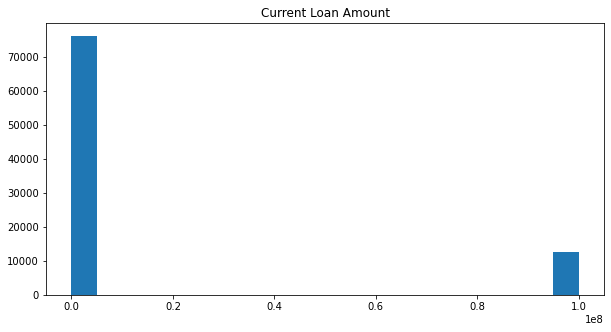

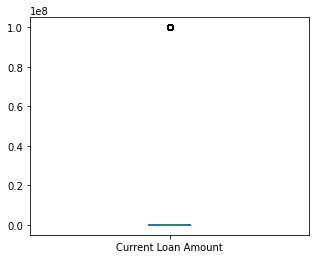

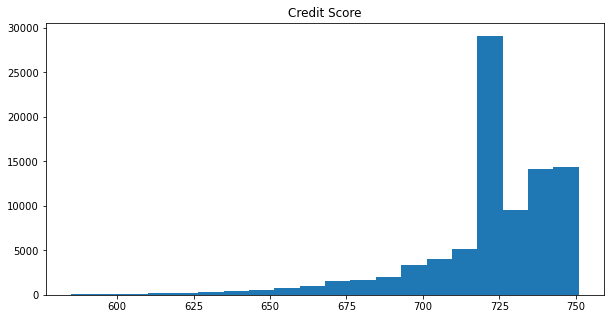

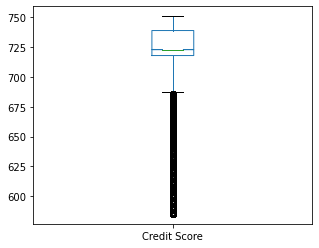

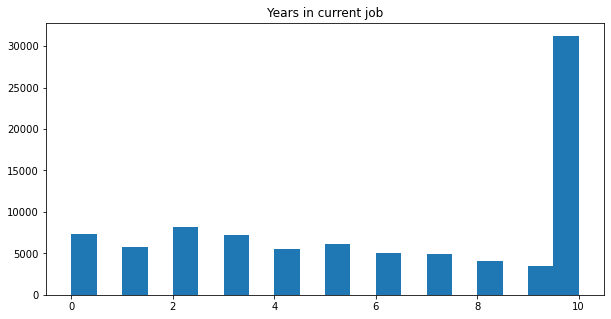

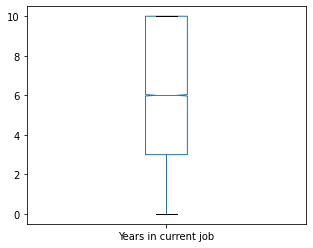

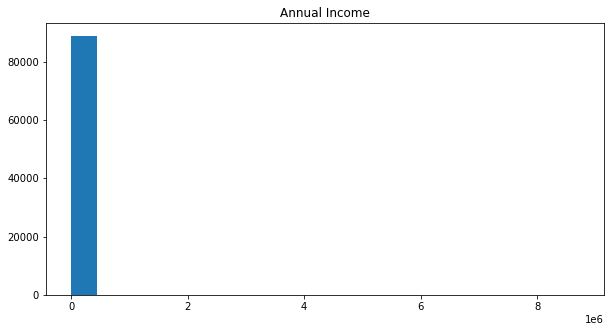

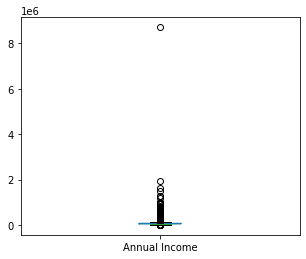

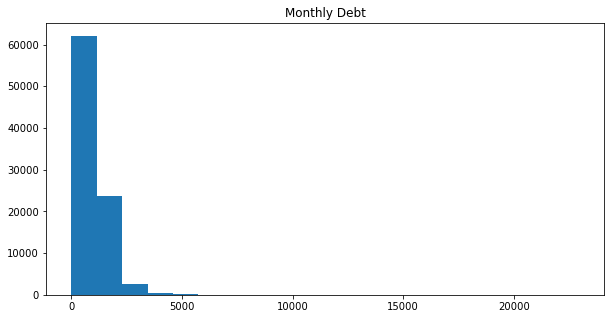

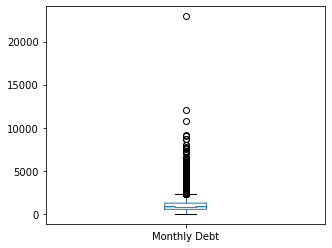

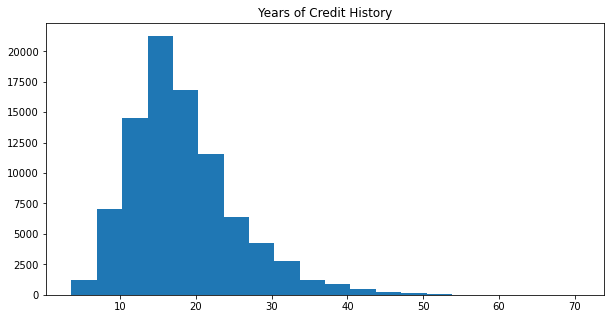

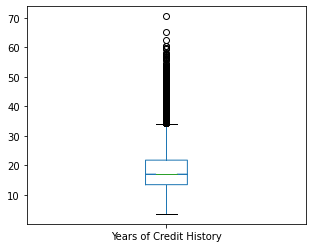

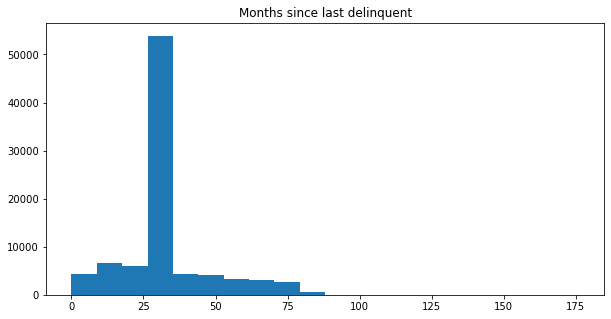

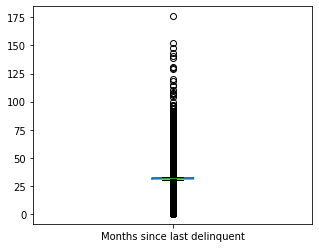

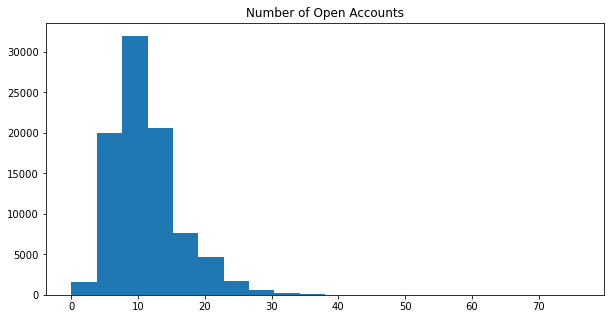

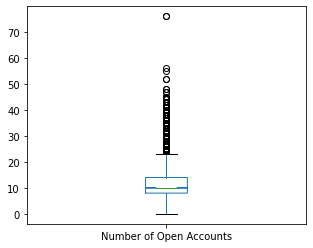

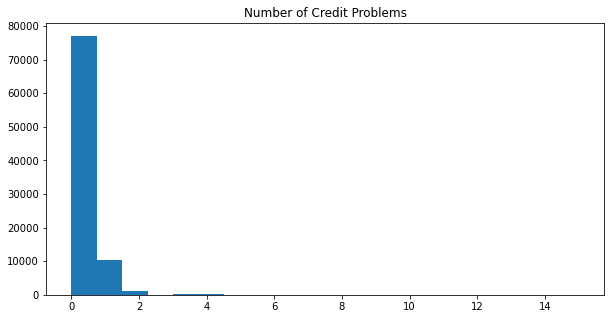

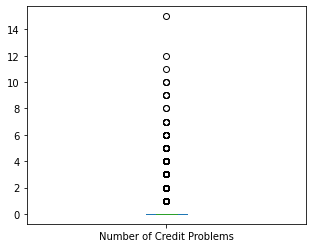

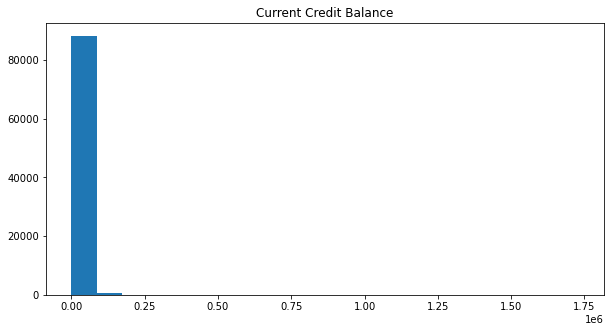

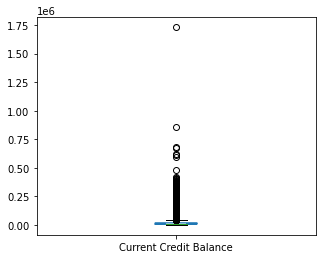

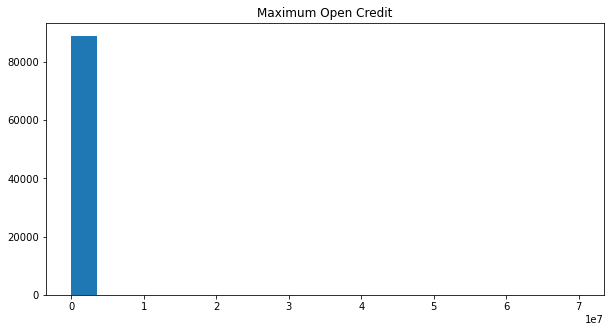

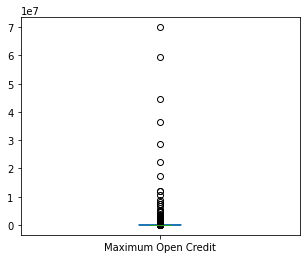

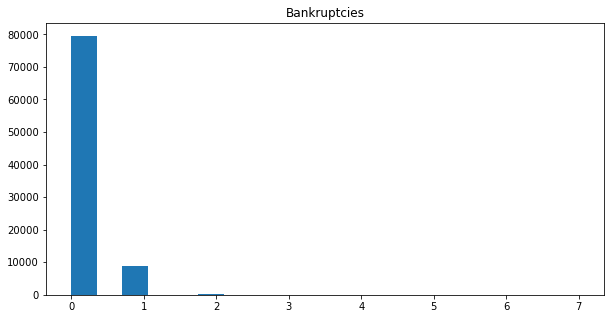

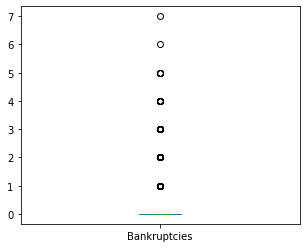

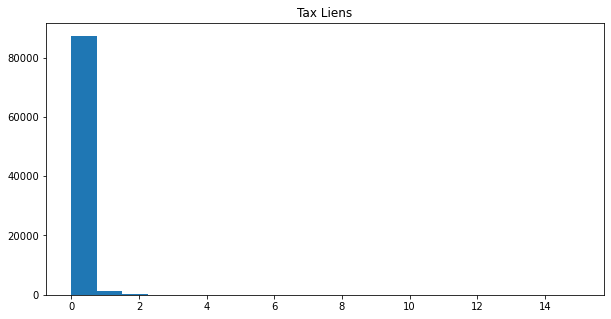

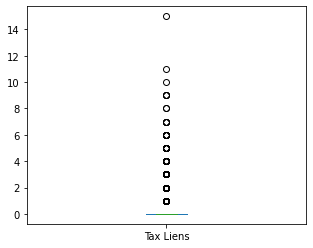

In [282]:
for col in numerical.columns:
    #histogram
    numerical.hist(column = col,
              grid=False,        #Do not include the grid
              figsize=(10,5),
            
              bins=20)     #(Length,Height) of the plot in inches
    plt.show()
    #boxplot
    numerical.boxplot(column= col,
                grid= False,
                figsize=(5,4),
                notch=True)
    plt.show()

### Train - validation Split

In [224]:
X = data_new.drop(['Loan Status'],axis=1)
y = data_new['Loan Status'].map({'Charged Off':0,'Fully Paid':1})

In [225]:

X['Term'].replace({'Short Term':0,'Long Term':1},inplace=True)

# One-hot encoding of categorical columns
X = pd.get_dummies(X,drop_first=True)

In [226]:
from sklearn.model_selection import train_test_split

In [227]:
X_train,X_valid,y_train,y_valid = train_test_split(X,y)

### using smote for imbalance data

In [228]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=3)
X_sm, y_sm = sm.fit_resample(X_train, y_train)

## Model fitting

In [229]:
# Libraries
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score, f1_score

### Decision Tree

In [230]:
dt = DecisionTreeClassifier()
dt.fit(X_sm,y_sm)
y_pred = dt.predict(X_valid)
print('ROC_AUC score :',roc_auc_score(y_valid,y_pred))

ROC_AUC score : 0.8557950952622247


### Random Forest

In [231]:
rf = RandomForestClassifier()
rf.fit(X_sm,y_sm)
y_pred = rf.predict(X_valid)
print('ROC_AUC score :',roc_auc_score(y_valid,y_pred))

ROC_AUC score : 0.8773374807444887


### Bagging 

In [234]:
bc = BaggingClassifier()
bc.fit(X_sm,y_sm)
y_pred = bc.predict(X_valid)
print('AUC_ROC score :',roc_auc_score(y_valid,y_pred))


AUC_ROC score : 0.8769770926432093


### AdaBoost

In [235]:
ac = AdaBoostClassifier()
ac.fit(X_sm,y_sm)
y_pred = ac.predict(X_valid)
print('AUC_ROC score :',roc_auc_score(y_valid,y_pred))

AUC_ROC score : 0.8824028168485132


### KNN

In [236]:
knn = KNeighborsClassifier()
knn.fit(X_sm,y_sm)
y_pred = knn.predict(X_valid)
print('AUC_ROC score :',roc_auc_score(y_valid,y_pred))

AUC_ROC score : 0.6924546652206216


#### Adaboost is performing well on validation data, so we will use it on test data

### Test Data

In [237]:
d1 = pd.read_csv('Loans - Public Test Set (IDs and Labels).csv')
d2 = pd.read_csv('Loans - Public Test Set (No Labels).csv')

In [239]:
# merging the two
test_data = pd.merge(left=d1,right=d2,how='inner',on='Loan ID')
test_data.head()

,Loan ID,Loan Status_x,Customer ID,Loan Status_y,Current Loan Amount,Term,Credit Score,Years in current job,Home Ownership,Annual Income,Purpose,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,Current Credit Balance,Maximum Open Credit,Bankruptcies,Tax Liens
0,03e0da0c-fac3-42f8-a396-ed5a226466e0,Fully Paid,16ecb7be-c90f-4bdb-b168-da705d9b1fa7,To be predicted,23023,Long Term,597,10+ years,Home Mortgage,72230,Debt Consolidation,$613.96,14.0,NaN,11,0,23188,NaN,NaN,NaN
1,01825d5d-429a-4de6-b3d4-8618364d2df2,Charged Off,9e0609db-23c1-43b0-9326-0e67ca1e8f1d,To be predicted,8126,Short Term,696,2 years,Rent,55869,Debt Consolidation,$665.78,10.9,NaN,14,0,6135,NaN,NaN,NaN
2,c159a79a-8d2b-447c-92a9-052b5466d6cd,Fully Paid,c54e404f-1e94-45a2-9473-972e2f3c378b,To be predicted,5042,Short Term,745,10+ years,Home Mortgage,40332,Debt Consolidation,873.86,16.4,11.0,6,0,6698,17958.0,0.0,0.0
3,c1428058-2dc6-4a88-b64c-b6034dfb4f8f,Charged Off,37923e4e-df73-4093-a4b8-c2dfcbd0c8d8,To be predicted,14139,Long Term,677,< 1 year,Rent,70693,Debt Consolidation,482.48,19.5,33.0,8,0,5928,7273.0,0.0,0.0
4,20344186-79bd-487a-b7c4-f3c7b57fe3e8,Charged Off,d5dc29d5-06f9-452e-9d55-c1d543dca5dd,To be predicted,15191,Long Term,716,10+ years,Home Mortgage,38442,Debt Consolidation,611.87,17.8,0.0,4,0,10714,11243.0,0.0,0.0


In [240]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44454 entries, 0 to 44453
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       44454 non-null  object 
 1   Loan Status_x                 44454 non-null  object 
 2   Customer ID                   44454 non-null  object 
 3   Loan Status_y                 44454 non-null  object 
 4   Current Loan Amount           44454 non-null  int64  
 5   Term                          44454 non-null  object 
 6   Credit Score                  44454 non-null  int64  
 7   Years in current job          42604 non-null  object 
 8   Home Ownership                44454 non-null  object 
 9   Annual Income                 44454 non-null  int64  
 10  Purpose                       44454 non-null  object 
 11  Monthly Debt                  44454 non-null  object 
 12  Years of Credit History       44454 non-null  float64
 13  M

In [241]:
test_data.isnull().sum()

Loan ID                            0
Loan Status_x                      0
Customer ID                        0
Loan Status_y                      0
Current Loan Amount                0
Term                               0
Credit Score                       0
Years in current job            1850
Home Ownership                     0
Annual Income                      0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent       2
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                2
Bankruptcies                       2
Tax Liens                          2
dtype: int64

In [242]:
## filling the missing values of Tax Leins with mode
test_data['Tax Liens'].fillna(value=(test_data['Tax Liens'].mode()[0]),inplace=True)

In [243]:
# filling missing values in bankruptcies with mode
test_data['Bankruptcies'].fillna(value=test_data['Bankruptcies'].mode()[0],inplace=True)

In [244]:
# maximum open credit
test_data['Maximum Open Credit'].value_counts()

0.0        240
0          104
9512.0       7
12168.0      7
9817.0       6
          ... 
21593.0      1
50311.0      1
28968.0      1
13128.0      1
67462        1
Name: Maximum Open Credit, Length: 34984, dtype: int64

In [245]:
# filling missing values in maximum open credit with mode
test_data['Maximum Open Credit'].fillna(value=test_data['Maximum Open Credit'].mode()[0],inplace=True)

In [247]:
# converting maximum peopen credit to numeric
test_data['Maximum Open Credit'] = pd.to_numeric(test_data['Maximum Open Credit'],errors='coerce')

In [248]:
test_data['Maximum Open Credit'].isnull().sum()

1

In [249]:
# filling missing values in maximum open credit with mode
test_data['Maximum Open Credit'].fillna(value=test_data['Maximum Open Credit'].mode()[0],inplace=True)

In [250]:
test_data.isnull().sum()

Loan ID                            0
Loan Status_x                      0
Customer ID                        0
Loan Status_y                      0
Current Loan Amount                0
Term                               0
Credit Score                       0
Years in current job            1850
Home Ownership                     0
Annual Income                      0
Purpose                            0
Monthly Debt                       0
Years of Credit History            0
Months since last delinquent       2
Number of Open Accounts            0
Number of Credit Problems          0
Current Credit Balance             0
Maximum Open Credit                0
Bankruptcies                       0
Tax Liens                          0
dtype: int64

In [253]:
## months since last delinquent

fullyPaid = test_data[test_data['Loan Status_x']=='Fully Paid']['Months since last delinquent']
chargedOff = test_data[test_data['Loan Status_x']=='Charged Off']['Months since last delinquent']
fullyPaid.fillna(value=fullyPaid.median(),inplace=True)
chargedOff.fillna(value=chargedOff.median(),inplace=True)

test_data['Months since last delinquent'][test_data['Loan Status_x']=='Fully Paid'] = fullyPaid

test_data['Months since last delinquent'][test_data['Loan Status_x']=='Charged Off'] = chargedOff

test_data['Months since last delinquent'].isnull().sum()

0

In [254]:
# years in current job
## filling missing values with mode
test_data['Years in current job'].fillna(value=test_data['Years in current job'].mode()[0],inplace=True)

In [255]:
# Converting the 'Years in current job' column into a numerical column
test_data['Years in current job'].replace({'10+ years':10, '< 1 year':0, '5 years':5, '1 year':1, '4 years':4, '7 years':7,
                                   '8 years':8, '6 years':6, '9 years':9, '2 years':2, '3 years':3},inplace=True)

In [256]:
test_data.isnull().sum()

Loan ID                         0
Loan Status_x                   0
Customer ID                     0
Loan Status_y                   0
Current Loan Amount             0
Term                            0
Credit Score                    0
Years in current job            0
Home Ownership                  0
Annual Income                   0
Purpose                         0
Monthly Debt                    0
Years of Credit History         0
Months since last delinquent    0
Number of Open Accounts         0
Number of Credit Problems       0
Current Credit Balance          0
Maximum Open Credit             0
Bankruptcies                    0
Tax Liens                       0
dtype: int64

In [257]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44454 entries, 0 to 44453
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       44454 non-null  object 
 1   Loan Status_x                 44454 non-null  object 
 2   Customer ID                   44454 non-null  object 
 3   Loan Status_y                 44454 non-null  object 
 4   Current Loan Amount           44454 non-null  int64  
 5   Term                          44454 non-null  object 
 6   Credit Score                  44454 non-null  int64  
 7   Years in current job          44454 non-null  int64  
 8   Home Ownership                44454 non-null  object 
 9   Annual Income                 44454 non-null  int64  
 10  Purpose                       44454 non-null  object 
 11  Monthly Debt                  44454 non-null  object 
 12  Years of Credit History       44454 non-null  float64
 13  M

In [258]:
test_data['Home Ownership'].value_counts()

Home Mortgage    21742
Rent             18820
Own Home          3892
Name: Home Ownership, dtype: int64

In [ ]:
# removing $ sign from monthly debt
test_data["Monthly Debt"] = test_data["Monthly Debt"].replace({"\$":""},regex=True)

In [261]:
# removing ',' sign from monthly debt
test_data["Monthly Debt"] = test_data["Monthly Debt"].replace({"\,":""},regex=True)

In [263]:
# converting to numeric
test_data['Monthly Debt'] = pd.to_numeric(test_data['Monthly Debt'])

In [265]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44454 entries, 0 to 44453
Data columns (total 20 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Loan ID                       44454 non-null  object 
 1   Loan Status_x                 44454 non-null  object 
 2   Customer ID                   44454 non-null  object 
 3   Loan Status_y                 44454 non-null  object 
 4   Current Loan Amount           44454 non-null  int64  
 5   Term                          44454 non-null  object 
 6   Credit Score                  44454 non-null  int64  
 7   Years in current job          44454 non-null  int64  
 8   Home Ownership                44454 non-null  object 
 9   Annual Income                 44454 non-null  int64  
 10  Purpose                       44454 non-null  object 
 11  Monthly Debt                  44454 non-null  float64
 12  Years of Credit History       44454 non-null  float64
 13  M

## segregating the data, dropping unnecesary columns

In [268]:
original_output = test_data['Loan Status_x'] # storing the loan status

In [269]:
## mapping the original output
mapped_original = original_output.map({'Charged Off':0,'Fully Paid':1})

In [272]:
final_test = test_data.drop(['Loan ID','Loan Status_x','Customer ID','Loan Status_y'],axis=1)
final_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 44454 entries, 0 to 44453
Data columns (total 16 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Current Loan Amount           44454 non-null  int64  
 1   Term                          44454 non-null  object 
 2   Credit Score                  44454 non-null  int64  
 3   Years in current job          44454 non-null  int64  
 4   Home Ownership                44454 non-null  object 
 5   Annual Income                 44454 non-null  int64  
 6   Purpose                       44454 non-null  object 
 7   Monthly Debt                  44454 non-null  float64
 8   Years of Credit History       44454 non-null  float64
 9   Months since last delinquent  44454 non-null  float64
 10  Number of Open Accounts       44454 non-null  int64  
 11  Number of Credit Problems     44454 non-null  int64  
 12  Current Credit Balance        44454 non-null  int64  
 13  M

In [273]:
final_test['Term'].replace({'Short Term':0,'Long Term':1},inplace=True)

# One-hot encoding of categorical columns
final_test = pd.get_dummies(final_test,drop_first=True)

In [274]:
final_test

,Current Loan Amount,Term,Credit Score,Years in current job,Annual Income,Monthly Debt,Years of Credit History,Months since last delinquent,Number of Open Accounts,Number of Credit Problems,...,Purpose_Medical Bills,Purpose_Other,Purpose_Take a Trip,Purpose_major_purchase,Purpose_moving,Purpose_other,Purpose_renewable_energy,Purpose_small_business,Purpose_vacation,Purpose_wedding
0,23023,1,597,10,72230,613.96,14.0,0.0,11,0,...,0,0,0,0,0,0,0,0,0,0
1,8126,0,696,2,55869,665.78,10.9,0.0,14,0,...,0,0,0,0,0,0,0,0,0,0
2,5042,0,745,10,40332,873.86,16.4,11.0,6,0,...,0,0,0,0,0,0,0,0,0,0
3,14139,1,677,0,70693,482.48,19.5,33.0,8,0,...,0,0,0,0,0,0,0,0,0,0
4,15191,1,716,10,38442,611.87,17.8,0.0,4,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
44449,12292,0,735,10,60506,1089.12,18.3,51.0,13,0,...,0,0,0,0,0,0,0,0,0,0
44450,4931,0,743,9,34514,509.07,13.0,0.0,8,1,...,0,0,0,0,0,0,0,0,0,0
44451,23272,1,632,10,68663,1224.49,15.5,0.0,16,0,...,0,0,0,0,0,0,0,0,0,0
44452,18611,1,668,10,44312,242.24,31.8,24.0,11,0,...,0,0,0,0,0,0,0,0,0,0


### KNN

In [276]:
knn = KNeighborsClassifier()
knn.fit(X_sm,y_sm)
y_pred = knn.predict(final_test)
print('AUC_ROC score :',roc_auc_score(mapped_original,y_pred))

AUC_ROC score : 0.5390863389066104


### Bagging

In [277]:
bc = BaggingClassifier()
bc.fit(X_sm,y_sm)
y_pred = bc.predict(final_test)
print('AUC_ROC score :',roc_auc_score(mapped_original,y_pred))


AUC_ROC score : 0.5759906473810379


### Decision Tree

In [279]:
dt = DecisionTreeClassifier()
dt.fit(X_sm,y_sm)
y_pred = dt.predict(final_test)
print('ROC_AUC score :',roc_auc_score(mapped_original,y_pred))

ROC_AUC score : 0.5443635723962329


### Using AdaBoost

In [275]:
ac = AdaBoostClassifier()
ac.fit(X_sm,y_sm)
y_pred = ac.predict(final_test)
print('AUC_ROC score :',roc_auc_score(mapped_original,y_pred))

AUC_ROC score : 0.6071266263979309


#### ADaBoost has performed better